   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


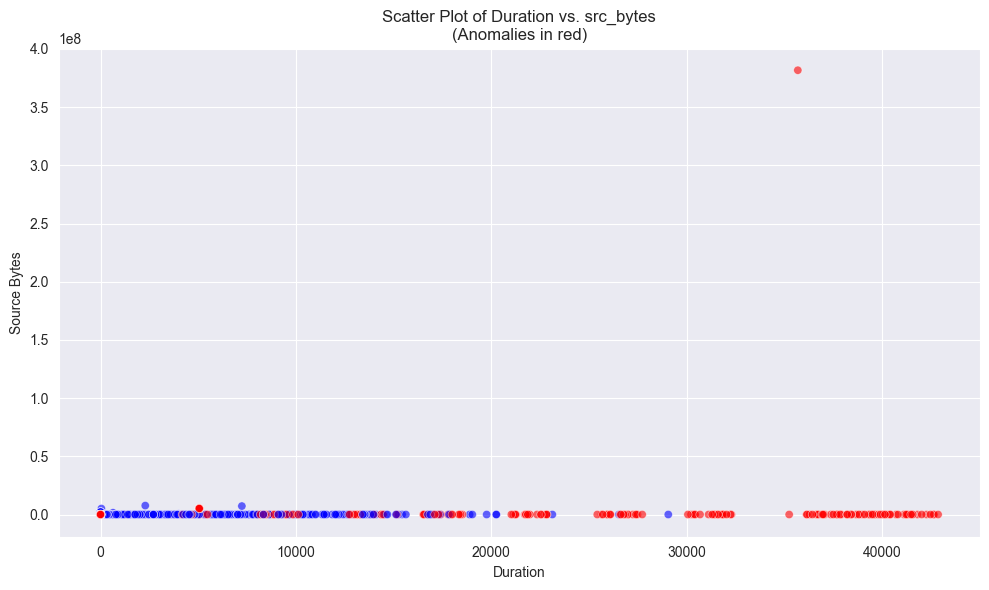

C:\Users\coope\AppData\Local\Temp\ipykernel_12416\3554872894.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette={'anomaly':'red', 'normal':'blue'})


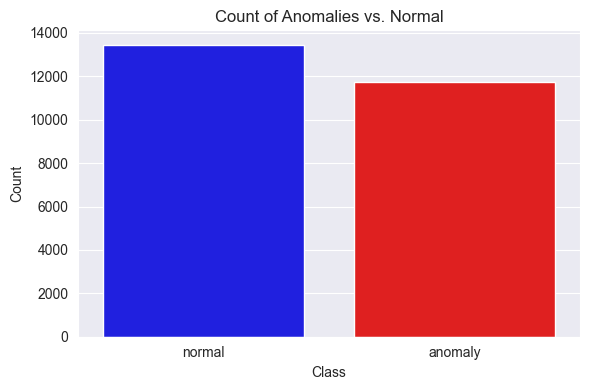

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_path = "Data/Train_data.csv"
df = pd.read_csv(file_path)

# Encode categorical features
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split data
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature importance and selection (optional)
feature_importance = xgb_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]

print("\nTop 10 Important Features:")
for i in sorted_indices[:10]:
    print(f"{features[i]}: {feature_importance[i]:.4f}")

# If you want to select features that account for 95% cumulative importance:
sorted_importances = feature_importance[sorted_indices]
cumulative_importance = np.cumsum(sorted_importances)
selected_features = features[sorted_indices][cumulative_importance <= 0.95]
print("Selected Features (95% Importance):", selected_features.tolist())
print("Number of Selected Features:", len(selected_features))
